**STOCK MARKET ANALYSIS**

**In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!**

**1.) What was the change in price of the stock over time?**

In [2]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



In [4]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

c:\python\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


*Let's use Yahoo and pandas to grab some data for some tech stocks.*

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

* globals() is a sloppy way of setting the DataFrame names, but its simple*

*Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data*

In [6]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-22,207.229996,203.610001,203.649994,207.220001,22277900.0,204.776108
2019-07-23,208.910004,207.289993,208.460007,208.839996,18355200.0,206.376984
2019-07-24,209.149994,207.169998,207.669998,208.669998,14991600.0,206.209015
2019-07-25,209.240005,206.729996,208.889999,207.020004,13909600.0,204.578476
2019-07-26,209.729996,207.139999,207.479996,207.740005,17618900.0,205.289978


In [7]:
# summary stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,279.623889,273.106905,275.976825,276.680158,3.522084e+07,275.548336
std,50.035378,48.962939,49.401052,49.640711,1.692498e+07,50.191970
min,198.070007,192.580002,195.410004,193.339996,1.165440e+07,191.059784
25%,237.647495,234.097496,235.042496,235.732498,2.405860e+07,233.837425
50%,277.994995,267.910004,271.129990,273.439987,3.085350e+07,272.701797
75%,318.717491,312.175011,315.322495,315.572495,4.064700e+07,314.978401
max,399.820007,385.959991,395.959991,393.429993,1.067212e+08,393.429993


In [8]:
# general info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-07-22 to 2020-07-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


*Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks*

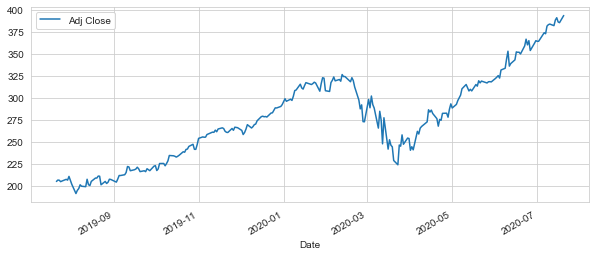

In [9]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

*1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?*

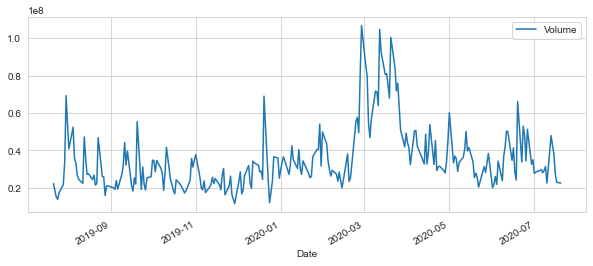

In [10]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

*Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.*

*Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.*

**What Is a Moving Average (MA)?
In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.**

In [12]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

In [13]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-07-22,207.229996,203.610001,203.649994,207.220001,22277900.0,204.776108,NaN,NaN,NaN
2019-07-23,208.910004,207.289993,208.460007,208.839996,18355200.0,206.376984,NaN,NaN,NaN
2019-07-24,209.149994,207.169998,207.669998,208.669998,14991600.0,206.209015,NaN,NaN,NaN
2019-07-25,209.240005,206.729996,208.889999,207.020004,13909600.0,204.578476,NaN,NaN,NaN
2019-07-26,209.729996,207.139999,207.479996,207.740005,17618900.0,205.289978,NaN,NaN,NaN


*Now let's go ahead and plot all the additional Moving Averages*

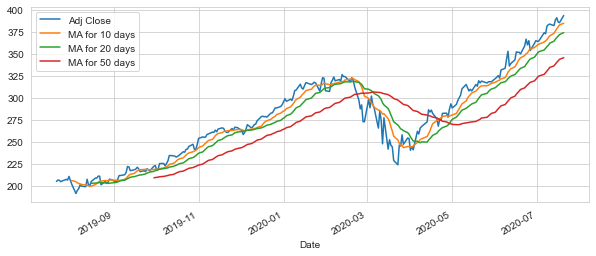

In [16]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

**Section 2 - Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.**

In [17]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [18]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-07-22,207.229996,203.610001,203.649994,207.220001,22277900.0,204.776108,NaN,NaN,NaN,NaN
2019-07-23,208.910004,207.289993,208.460007,208.839996,18355200.0,206.376984,NaN,NaN,NaN,0.007818
2019-07-24,209.149994,207.169998,207.669998,208.669998,14991600.0,206.209015,NaN,NaN,NaN,-0.000814
2019-07-25,209.240005,206.729996,208.889999,207.020004,13909600.0,204.578476,NaN,NaN,NaN,-0.007907
2019-07-26,209.729996,207.139999,207.479996,207.740005,17618900.0,205.289978,NaN,NaN,NaN,0.003478


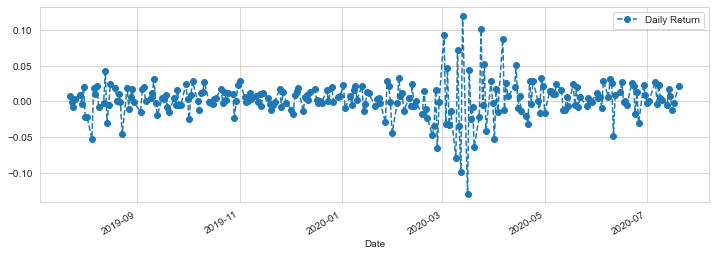

In [19]:
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

**Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.**

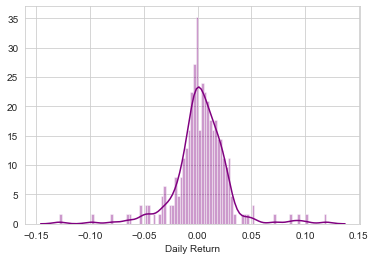

In [20]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

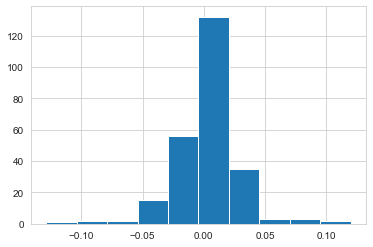

In [21]:
AAPL['Daily Return'].hist()

*Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.*

In [22]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [23]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-22,204.776108,1138.069946,136.747269,1985.630005
2019-07-23,206.376984,1146.209961,137.596817,1994.489990
2019-07-24,206.209015,1137.810059,139.009445,2000.810059
2019-07-25,204.578476,1132.119995,138.485886,1973.819946
2019-07-26,205.289978,1250.410034,139.621902,1943.050049


In [24]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-07-22,207.229996,203.610001,203.649994,207.220001,22277900.0,204.776108,NaN,NaN,NaN,NaN
2019-07-23,208.910004,207.289993,208.460007,208.839996,18355200.0,206.376984,NaN,NaN,NaN,0.007818
2019-07-24,209.149994,207.169998,207.669998,208.669998,14991600.0,206.209015,NaN,NaN,NaN,-0.000814
2019-07-25,209.240005,206.729996,208.889999,207.020004,13909600.0,204.578476,NaN,NaN,NaN,-0.007907
2019-07-26,209.729996,207.139999,207.479996,207.740005,17618900.0,205.289978,NaN,NaN,NaN,0.003478


In [25]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [26]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-22,NaN,NaN,NaN,NaN
2019-07-23,0.007818,0.007152,0.006213,0.004462
2019-07-24,-0.000814,-0.007328,0.010266,0.003169
2019-07-25,-0.007907,-0.005001,-0.003766,-0.013490
2019-07-26,0.003478,0.104485,0.008203,-0.015589


*Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.*

In [27]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

*Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.*

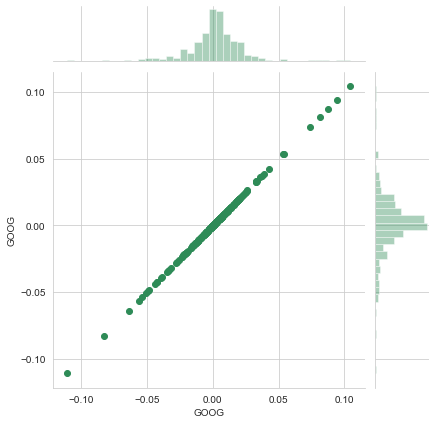

In [28]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

*So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.*

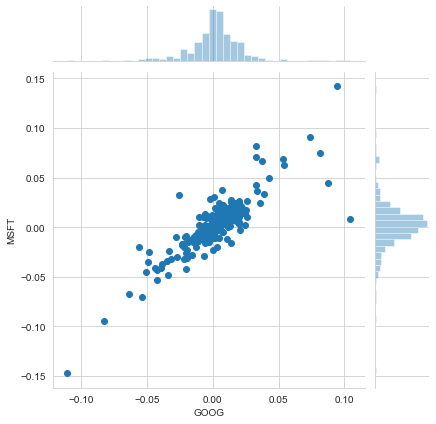

In [29]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

*Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:*

*Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot*

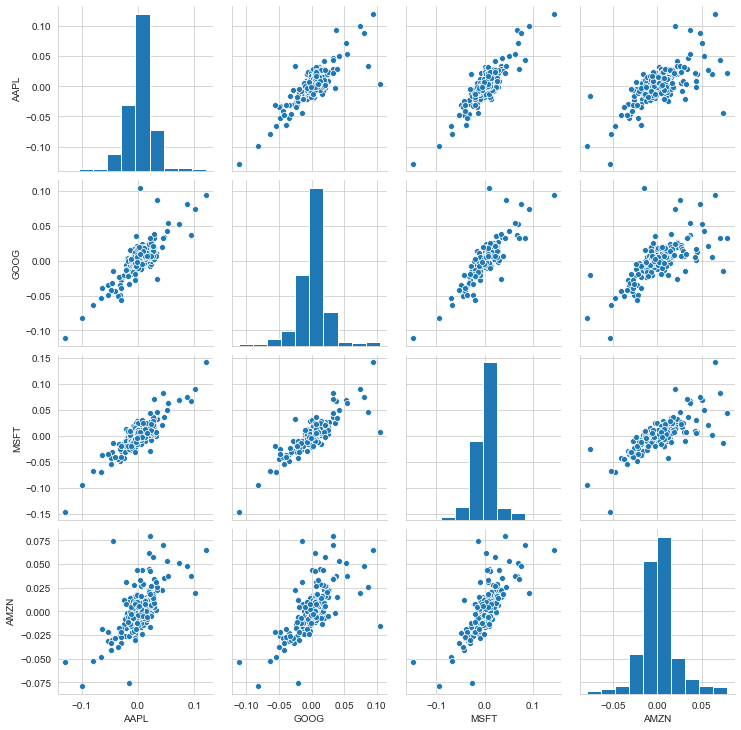

In [31]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

* While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.*

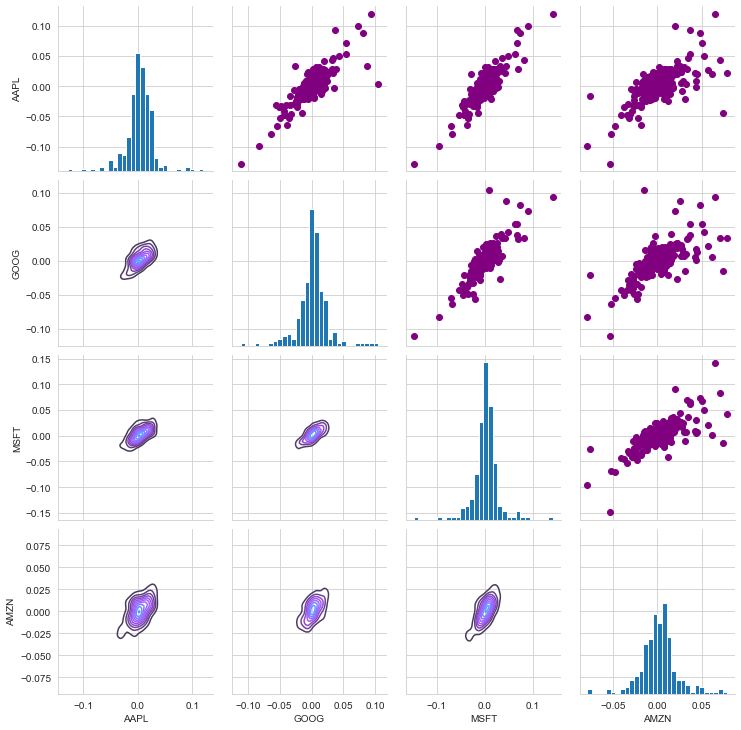

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

**We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.**

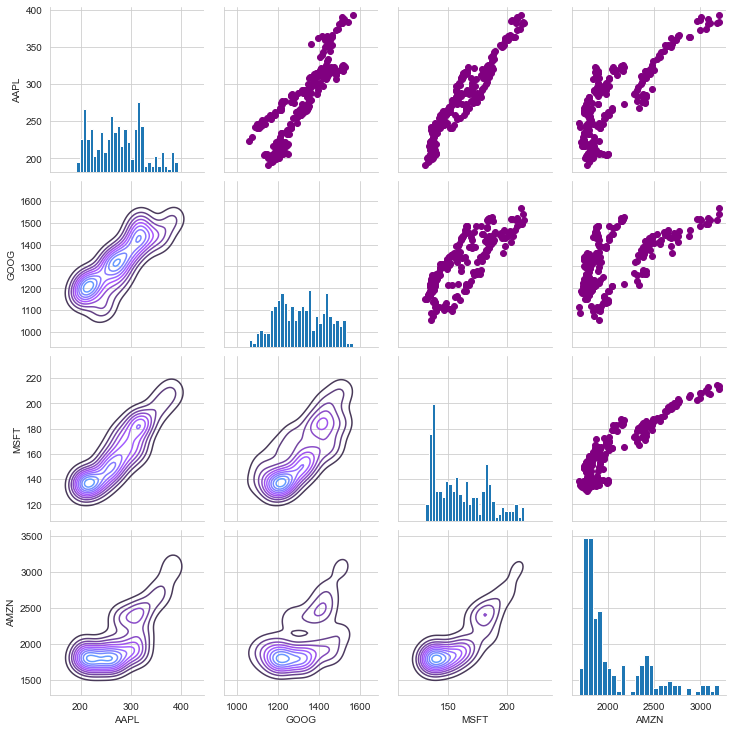

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

**Risk Analysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns**

In [35]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

In [36]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-23,0.007818,0.007152,0.006213,0.004462
2019-07-24,-0.000814,-0.007328,0.010266,0.003169
2019-07-25,-0.007907,-0.005001,-0.003766,-0.013490
2019-07-26,0.003478,0.104485,0.008203,-0.015589
2019-07-29,0.009338,-0.008797,-0.002193,-0.015748


In [37]:
area = np.pi*20

In [38]:
area

62.83185307179586

In [39]:
rets.mean()

Symbols
AAPL    0.002933
GOOG    0.001540
MSFT    0.002072
AMZN    0.002120
dtype: float64

In [40]:
rets.std()

Symbols
AAPL    0.025606
GOOG    0.023227
MSFT    0.025740
AMZN    0.021100
dtype: float64

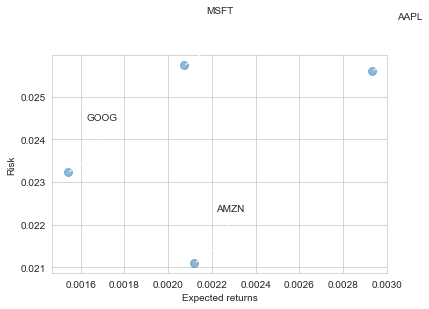

In [43]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.025])
# plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

*Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.*

**Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.**

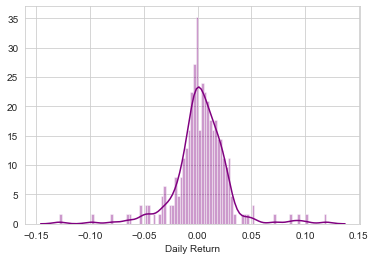

In [44]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

**Now we can use quantile to get the risk value for the stock.**

In [45]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.03430130015325128

In [46]:
# The 0.05 empirical quantile of daily returns is at -0.034. 
# That means that with 95% confidence, our worst daily loss will not exceed 3.4%.
# If we have a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = $34,000.

**Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt−−−√
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt−−−√)
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.**

In [47]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [48]:
mu

0.0015402203059161224

In [49]:
sigma

0.023226890676820832

**Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns**

In [51]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [52]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-22,1139.250000,1124.239990,1133.449951,1138.069946,1301500,1138.069946
2019-07-23,1146.900024,1131.800049,1144.000000,1146.209961,1093700,1146.209961
2019-07-24,1144.000000,1126.989990,1131.900024,1137.810059,1589800,1137.810059
2019-07-25,1141.699951,1120.920044,1137.819946,1132.119995,2209800,1132.119995
2019-07-26,1265.550049,1224.000000,1224.040039,1250.410034,4805800,1250.410034


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

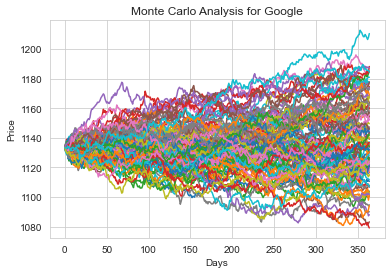

In [54]:
# Get start price from GOOG.head()
start_price = 1133.449951

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [55]:
# Let's go ahead and get a histogram of the end results for a much larger run.

In [57]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

In [58]:
# Now that we have our array of simulations,
# we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

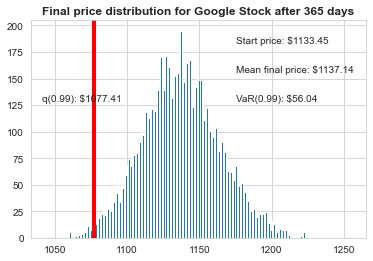

In [59]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [ ]:
# Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, 
# which looks to be $56.04 for every investment of 1137.14 (the price of one inital google stock).

# This basically menas for every initial stock you purchase your putting about $56.04 at risk 99% of the time from our Monte Carlo Simulation.